<a href="https://colab.research.google.com/github/Bisalia/Crud_app/blob/main/Copy_of_%D0%90%D1%80%D0%BC%D0%B5%D0%BB%D0%AC_Gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression


In [ ]:
dataset_cols = ["bike_count", "hour","temp", "humidity",  "wind", "visibility", "dew_pt_temp", "radiation", "rain", "snow", "functional"]

df= pd.read_csv('SeoulBikeData.csv', encoding= 'unicode_escape').drop(["Date", "Holiday", "Seasons"], axis=1)
df.columns = dataset_cols
df["functional"] = (df["functional"]=="Yes").astype(int)
df=df[df["hour"]==12]
df= df.drop(["hour"], axis=1)


In [ ]:
df= df.drop(["wind", "visibility", "functional"], axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


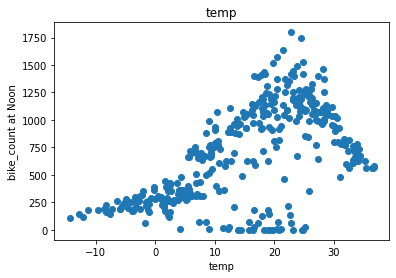

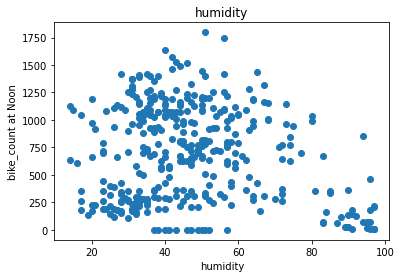

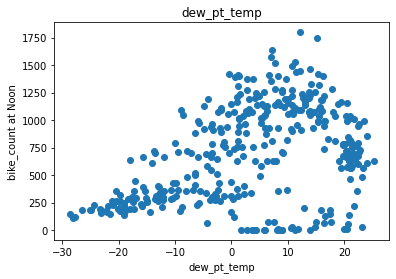

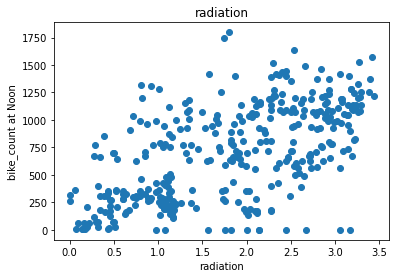

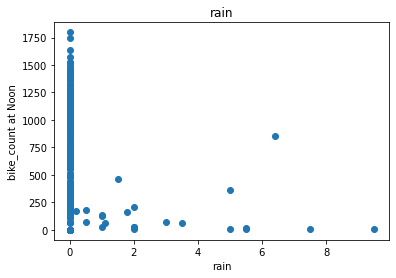

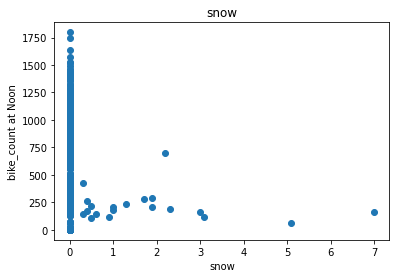

In [ ]:
for label in df.columns[1:]:
  plt.scatter(df[label], df["bike_count"])
  plt.title(label)
  plt.ylabel("bike_count at Noon")
  plt.xlabel(label)
  plt.show()

Train/Val/Test


In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe=copy.deepcopy(dataframe)
  if x_labels is None:
    x = dataframe[[c for c in dataframe.columns if c!= y_label]].values
  else:
    if len(x_labels)==1:
      x = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      x = dataframe[x_labels].values
  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((x, y))

  return data, x, y,  
 


In [ ]:
_, x_train_temp, y_train_temp = get_xy(train, "bike_count", x_labels=["temp"])
_, x_val_temp, y_val_temp = get_xy(val, "bike_count", x_labels=["temp"])
_, x_test_temp, y_test_temp = get_xy(test, "bike_count", x_labels=["temp"])

In [ ]:
x_train_temp

array([[  5.5],
       [ 17.8],
       [ 19.8],
       [ 16.2],
       [ 25.2],
       [ 31.9],
       [ 36.5],
       [ -1.3],
       [  3.9],
       [ 28.2],
       [  2.9],
       [  4.3],
       [ 14.9],
       [  4.5],
       [ 24. ],
       [ 16.4],
       [  4. ],
       [ 15.7],
       [ 33.6],
       [  4. ],
       [ 35.5],
       [  1.7],
       [  9.1],
       [ 33.7],
       [ 17.4],
       [ 30.3],
       [  2.5],
       [ -6.5],
       [  5.3],
       [ 14.7],
       [ 18.4],
       [ 33.4],
       [ 12.8],
       [ 21.7],
       [ 27.8],
       [  5.5],
       [ 34.1],
       [ 20.3],
       [ 25.2],
       [ 30.8],
       [ 24.1],
       [ 20. ],
       [ 15.3],
       [ 22.2],
       [  7.3],
       [ 26.7],
       [ 13.8],
       [ 23.2],
       [ 19. ],
       [ 20.5],
       [ -9.6],
       [ 10. ],
       [ 23.8],
       [ 25.8],
       [ 20.8],
       [  6. ],
       [ 13.9],
       [ 10.7],
       [ 18.2],
       [ 16.6],
       [ -1.5],
       [  0.5],
       [

In [ ]:
temp_reg = LinearRegression()
temp_reg.fit(x_train_temp, y_train_temp)

LinearRegression()

In [ ]:
print(temp_reg.coef_, temp_reg.intercept_)

[[19.36302864]] [392.26460899]


In [ ]:
temp_reg.score(x_test_temp, y_test_temp)

0.2934293172056456

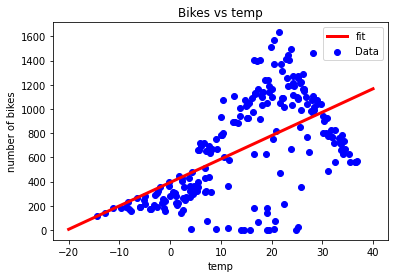

In [ ]:
plt.scatter(x_train_temp, y_train_temp, label="Data", color = "blue")
x = tf.linspace(-20, 40, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label = "fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs temp")
plt.ylabel("number of bikes")
plt.xlabel("temp")
plt.show()



In [ ]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, x_train_all, y_train_all = get_xy(train, "bike_count", x_labels=df.columns[1:])
_, x_val_all, y_val_all = get_xy(val, "bike_count", x_labels=df.columns[1:])
_, x_test_all, y_test_all = get_xy(test, "bike_count", x_labels=df.columns[1:])

In [ ]:
all_reg =LinearRegression()
all_reg.fit(x_train_all, y_train_all)

LinearRegression()

In [ ]:
all_reg.score(x_train_all, y_train_all)

0.5039715842140082

gradient descent


In [ ]:
x1 = df["temp"]
x2= df["dew_pt_temp"]
y  = df["bike_count"]
x1 =(x1-x1.mean()/x1.std())
x2 =(x2-x2.mean()/x2.std())

x = np.c_[x1, x2, np.ones(x1.shape[0])]

x.shape


(365, 3)

In [ ]:
learning_rate = 0.01
epochs =2000
N = y.size
np.random.seed(12)
coef =np.random.randn(3)
print("initial of coefficient is", coef)

initial of coefficient is [ 0.47298583 -0.68142588  0.2424395 ]


In [ ]:
def grad(x, y, coef,  epochs, learning_rate):
  past_costs=[]
  past_coef = [coef]
  for i in range(epochs):
    prediction = np.dot(x, coef)
    error = prediction-y
    cost = 1/(2*N) * np.dot(error.T, error)
    past_costs.append(cost)
    der = 1/(2*N) * learning_rate * np.dot(error.T, error)
    coef = coef - der
    past_coef.append(coef)
  return past_coef, past_costs
past_coef, past_costs=grad(x, y, coef, epochs, learning_rate)

coef = past_coef[-1]

print("final values of coeffiences:", coef)


final values of coeffiences: [nan nan nan]


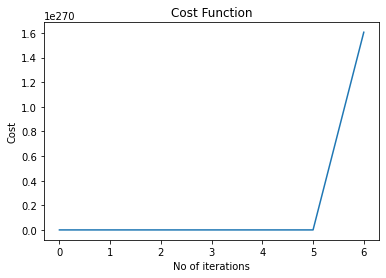

In [ ]:
plt.title("Cost Function")
plt.xlabel("No of iterations")
plt.ylabel("Cost")
plt.plot(past_costs)
plt.show()